In [969]:
# Cel 1
#Deze code is oorspronkelijk geschreven door Thijs Snel en aangepast door Femke Verheijen en Bert Buisman

#imports
import pyaudio
import wave
import os
import numpy as np

# Audioconfiguratie
Chunk = 1024  # Aantal frames per buffer (verkleint geheugenbelasting)
Format = pyaudio.paInt16  # 16-bit audioformaat (standaard voor veel toepassingen)
Rate = 44100  # Samplefrequentie in Hz (CD-kwaliteit)
seconds = 10  # Totale opnameduur in seconden
output_file = "test.wav"  # Naam van het uitvoerbestand
Channels = 1  # Mono-opname (voor eenvoudiger verwerking)

# Controleer of het bestand al bestaat en waarschuw de gebruiker
if os.path.exists(output_file):
    print(f"⚠️ Waarschuwing: {output_file} bestaat al en zal worden overschreven.")
    
# Initialiseer PyAudio en start opname
p = pyaudio.PyAudio()
stream = p.open(format=Format, channels=Channels, rate=Rate, input=True, frames_per_buffer=Chunk)

print("🎤 Start opname...")
frames = []  # Opslag voor audioblokken
clipping_detected = False  # Vlag voor detectie van oversturing

# Lees de audioblokken en sla ze op
for _ in range(int(Rate / Chunk * seconds)):
    data = stream.read(Chunk)
    frames.append(data)

    # Controleer op clipping (oversturing)
    audio_array = np.frombuffer(data, dtype=np.int16)
    if np.any(audio_array >= 32767) or np.any(audio_array <= -32768):
        clipping_detected = True
    
print("🛑 Opname gestopt.")
stream.stop_stream()
stream.close()
p.terminate()

# Opslaan als WAV-bestand
with wave.open(output_file, 'wb') as wf:
    wf.setnchannels(Channels)
    wf.setsampwidth(p.get_sample_size(Format))
    wf.setframerate(Rate)
    wf.writeframes(b''.join(frames))

# Geef feedback over mogelijke vervorming
if clipping_detected:
    print("⚠️ Waarschuwing: Clipping gedetecteerd! Het opgenomen geluid is mogelijk vervormd.")
else:
    print("✅ Geen clipping gedetecteerd.") 

⚠️ Waarschuwing: test.wav bestaat al en zal worden overschreven.
🎤 Start opname...
🛑 Opname gestopt.
✅ Geen clipping gedetecteerd.


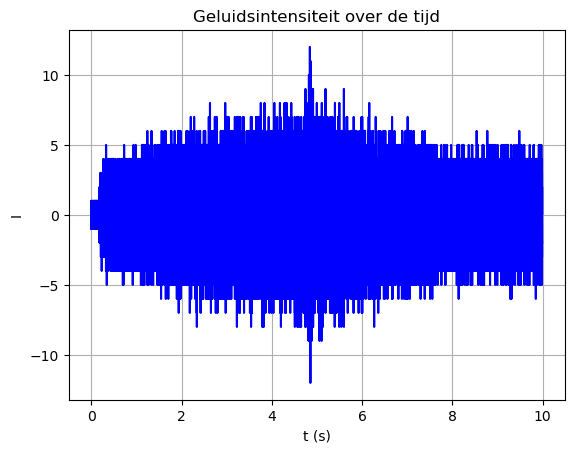

In [971]:
# Cel 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Inlezen van het .wav bestand
file_path = 'test.wav'
sampling_rate, audio_data = wavfile.read(file_path)

# Tijd-array maken
duration = len(audio_data) / sampling_rate
time = np.linspace(0., duration, len(audio_data))

# Grafiek plotten
plt.plot(time, audio_data, color='blue')
plt.title('Geluidsintensiteit over de tijd')
plt.xlabel('t (s)')
plt.ylabel('I')
plt.grid(True)
plt.show()


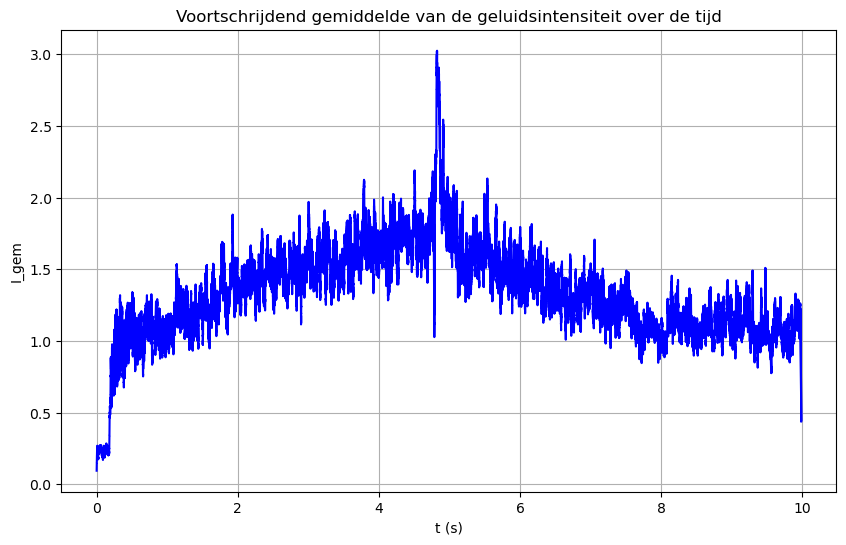

In [973]:
# Cel 3
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Stel hier de lengte van het tijdsinterval in
tijdsinterval = 0.01

# Inlezen van het .wav bestand
file_path = 'test.wav'  
sampling_rate, audio_data = wavfile.read(file_path)

# Tijd-array maken
duration = len(audio_data) / sampling_rate
time = np.linspace(0., duration, len(audio_data))

# Bepaal de grootte van het tijdsinterval bij het voortschrijdend gemiddelde
window_size = int(tijdsinterval * sampling_rate)  # Aantal samples in het tijdsinterval

# Bereken het voortschrijdend gemiddelde van de absolute waarde van de amplitude
rolling_avg = np.convolve(np.abs(audio_data), np.ones(window_size)/window_size, mode='same')

# Grafiek plotten
plt.figure(figsize=(10, 6))
plt.plot(time, rolling_avg, color='blue')
plt.title('Voortschrijdend gemiddelde van de geluidsintensiteit over de tijd')
plt.xlabel('t (s)')
plt.ylabel('I_gem')
plt.grid(True)
plt.show()


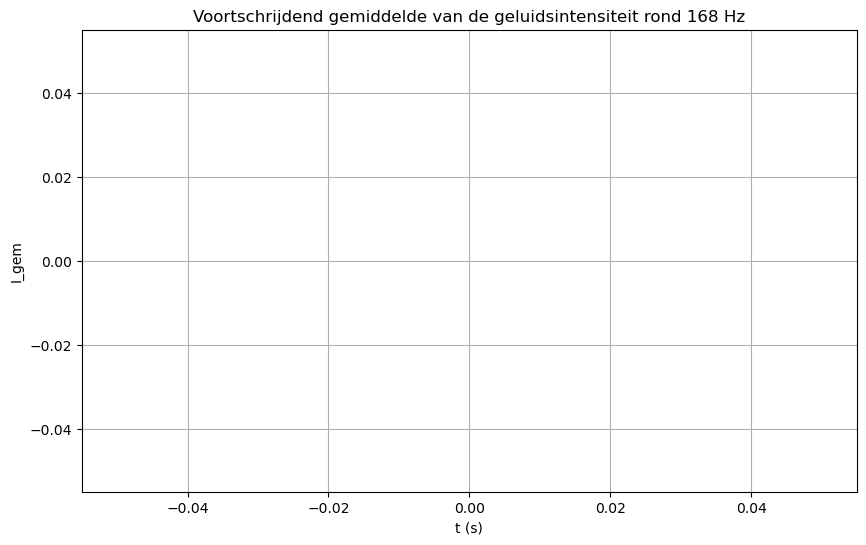

In [975]:
# Cel 4
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt

# Inlezen van het .wav bestand
file_path = 'test.wav'  
sampling_rate, audio_data = wavfile.read(file_path)

# Stel de lengte van het tijdsinterval in
tijdsinterval = 0.08

# Stel de middenfrequentie en bandbreedte van de bandfilter in
center_freq = 168
bandwidth = 10

# Ontwerp een bandpass filter
def butter_bandpass(center_freq, bandwidth, fs, order=4):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Pas het bandpassfilter toe op de audio data
b, a = butter_bandpass(center_freq, bandwidth, sampling_rate)
filtered_audio_data = filtfilt(b, a, audio_data)

# Tijd-array maken
duration = len(audio_data) / sampling_rate
time = np.linspace(0., duration, len(audio_data))

# Bepaal de grootte van het tijdsinterval bij het voortschrijdend gemiddelde
window_size = int(tijdsinterval * sampling_rate) 

# Bereken het voortschrijdend gemiddelde van de absolute waarde van de amplitude
rolling_avg = np.convolve(np.abs(filtered_audio_data), np.ones(window_size)/window_size, mode='same')

# Maak de grafiek
plt.figure(figsize=(10, 6))
plt.plot(time, rolling_avg, color='blue')
plt.title(f'Voortschrijdend gemiddelde van de geluidsintensiteit rond {center_freq} Hz')
plt.xlabel('t (s)')
plt.ylabel('I_gem')
plt.grid(True)
plt.show()

In [977]:
# Cel 5
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt

# Inlezen van het .wav bestand
file_path = 'test.wav'  
sampling_rate, audio_data = wavfile.read(file_path)

# Stel de begintijd en eindtijd in om de gemiddelde intensiteit te berekenen
t_start = 1.0  # in seconden
t_end = 9.0    # in seconden

# Stel de middenfrequentie en bandbreedte van de bandfilter in
center_freq = 168
bandwidth = 10

# Ontwerp een bandpass filter
def butter_bandpass(center_freq, bandwidth, fs, order=4):
    nyquist = 0.5 * fs
    low = (center_freq - bandwidth / 2) / nyquist
    high = (center_freq + bandwidth / 2) / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Pas het bandpassfilter toe op de audio data
b, a = butter_bandpass(center_freq, bandwidth, sampling_rate)
filtered_audio_data = filtfilt(b, a, audio_data)

# Tijd-array maken
duration = len(audio_data) / sampling_rate
time = np.linspace(0., duration, len(audio_data))

# Bereken de gemiddelde (absolute) intensiteit (tussen de begintijd en eindtijd)
idx_start = int(t_start * sampling_rate)
idx_end = int(t_end * sampling_rate)
signal_segment = filtered_audio_data[idx_start:idx_end]
avg_intensity = np.mean(np.abs(signal_segment))

print(f"De gemiddelde intensiteit tussen {t_start} en {t_end} seconden is: {(avg_intensity)}")

dB = 10 * np.log10(avg_intensity) 



print(f"de geluidssterkte is {dB} dB")

De gemiddelde intensiteit tussen 1.0 en 9.0 seconden is: nan
de geluidssterkte is nan dB


Verantwoording AI gebruik:

De code in cellen 2 t/m 5 is geschreven met behulp van ChatGPT. Hierbij zijn de volgende prompts gebruikt:

Cel 2: Schrijf een Python code om een .wav bestand in te lezen en te plotten. In de grafiek staat de intensiteit op de y-as en de tijd op de x-as.

Cel 3: Bereken nu een voortschrijdend gemiddelde van de intensiteit. Zet deze op de y-as van de grafiek.

Cel 4: Voeg nu een bandfilter toe rond een frequentie van 320 Hz. Maak daarbij gebruik van butter en filtfilt uit scipy.signal

Cel 5: Voeg nog een functie toe waarmee de gemiddelde intensiteit tussen tijdstip 1 en tijdstip 2 berekend wordt.

De code in elk van deze cellen is gekopieerd en aangepast aan de specifieke omstandigheden van dit practicum.

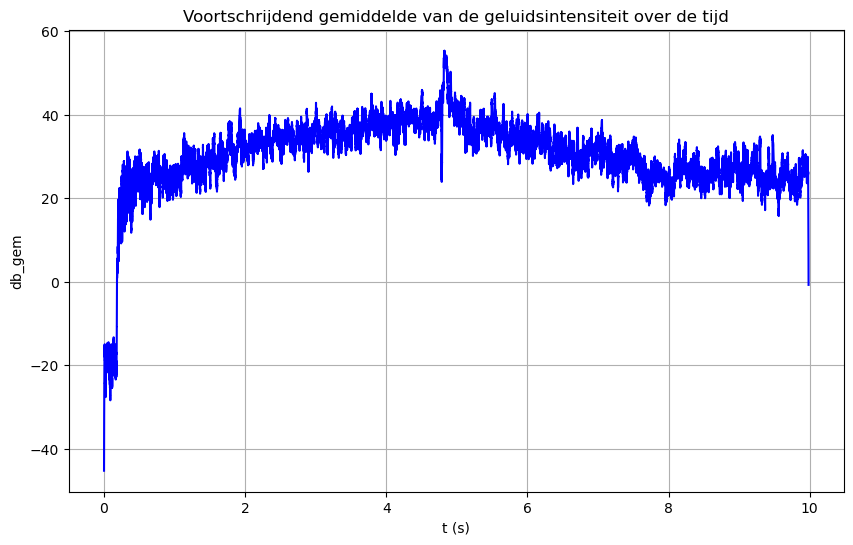

In [979]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pandas as pd
from scipy.io import wavfile
import os

# Stel hier de lengte van het tijdsinterval in
tijdsinterval = 0.01

# Inlezen van het .wav bestand
file_path = 'test.wav'  
sampling_rate, audio_data = wavfile.read(file_path)

# Tijd-array maken
duration = len(audio_data) / sampling_rate
time = np.linspace(0., duration, len(audio_data))

# Bepaal de grootte van het tijdsinterval bij het voortschrijdend gemiddelde
window_size = int(tijdsinterval * sampling_rate)  # Aantal samples in het tijdsinterval

# Bereken het voortschrijdend gemiddelde van de absolute waarde van de amplitude
rolling_avg = np.convolve(np.abs(audio_data), np.ones(window_size)/window_size, mode='same')

db_gem = 10 * np.log10(rolling_avg) * 6.69344 + 23.118

df = pd.DataFrame({'Tijd (s)': time, 'Geluidsintensiteit (dB)': db_gem})
df.to_csv("C:/Users/mickc/OneDrive/Documenten/Technisch natuurkunden jaar 1/project 3/csv bestanden/meting59.csv", index=False)



# Grafiek plotten
plt.figure(figsize=(10, 6))
plt.plot(time, db_gem, color='blue')
plt.title('Voortschrijdend gemiddelde van de geluidsintensiteit over de tijd')
plt.xlabel('t (s)')
plt.ylabel('db_gem')
plt.grid(True)
plt.show()